In [6]:
import pandas as pd

# Remplace par le chemin de ton fichier
file_path = 'data.csv'

# Charger le fichier CSV
df = pd.read_csv(file_path , header=1)

# Afficher les premières lignes
print(df.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [7]:
df.shape

(30000, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
# feature engeneering variable age 


# Exemple : si tu as déjà un DataFrame df avec une colonne AGE

# Créer des tranches d'âge personnalisées
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Appliquer les tranches à la colonne AGE
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Vérifier le résultat
print(df[['AGE', 'AGE_GROUP']].head())


   AGE AGE_GROUP
0   24     20-29
1   26     20-29
2   34     30-39
3   37     30-39
4   57     50-59


In [10]:



# Colonnes des factures et des paiements
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

# Moyenne des factures sur 6 mois
df['AVG_BILL_AMT'] = df[bill_cols].mean(axis=1)

# Moyenne des paiements sur 6 mois
df['AVG_PAY_AMT'] = df[pay_cols].mean(axis=1)

# Total factures et total paiements sur 6 mois
df['TOTAL_BILL_AMT'] = df[bill_cols].sum(axis=1)
df['TOTAL_PAY_AMT'] = df[pay_cols].sum(axis=1)

# Ratio paiement / facture (avec un petit epsilon pour éviter division par zéro)
epsilon = 1e-5
df['RATIO_PAY_BILL'] = df['AVG_PAY_AMT'] / (df['AVG_BILL_AMT'] + epsilon)

# Couverture totale des paiements par rapport aux factures
df['PAYMENT_COVERAGE'] = df['TOTAL_PAY_AMT'] / (df['TOTAL_BILL_AMT'] + epsilon)

# Afficher un aperçu des nouvelles features
print(df[['AVG_BILL_AMT', 'AVG_PAY_AMT', 'TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'RATIO_PAY_BILL', 'PAYMENT_COVERAGE']].head())


   AVG_BILL_AMT  AVG_PAY_AMT  TOTAL_BILL_AMT  TOTAL_PAY_AMT  RATIO_PAY_BILL  \
0   1284.000000   114.833333            7704            689        0.089434   
1   2846.166667   833.333333           17077           5000        0.292791   
2  16942.166667  1836.333333          101653          11018        0.108388   
3  38555.666667  1398.000000          231334           8388        0.036259   
4  18223.166667  9841.500000          109339          59049        0.540054   

   PAYMENT_COVERAGE  
0          0.089434  
1          0.292791  
2          0.108388  
3          0.036259  
4          0.540054  


In [12]:
# feature  engeneering historique 
# Retard moyen sur les 6 mois
#df[pay_cols].mean(axis=1) : calcule la moyenne des retards pour chaque client (ligne par ligne).

#(df[pay_cols] > 0).sum(axis=1) : compte combien de mois ont un retard supérieur à 0.


df['AVG_DELAY'] = df[pay_cols].mean(axis=1)

# Nombre de mois avec un retard (valeurs > 0)
df['NUM_LATE_PAYMENTS'] = (df[pay_cols] > 0).sum(axis=1)


In [15]:
#pas de valeurs manquantes
print(df.isnull().mean().sort_values(ascending=False))

ID                            0.0
AGE_GROUP                     0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
AVG_BILL_AMT                  0.0
LIMIT_BAL                     0.0
AVG_PAY_AMT                   0.0
TOTAL_BILL_AMT                0.0
TOTAL_PAY_AMT                 0.0
RATIO_PAY_BILL                0.0
PAYMENT_COVERAGE              0.0
AVG_DELAY                     0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT2                     0.0
BILL_AMT1                     0.0
PAY_6                         0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE           

In [22]:


import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['AGE_GROUP'] = le.fit_transform(df['AGE_GROUP'])

# 1. Chargement des données
# df = pd.read_csv(...) ← à adapter si pas déjà chargé

# 2. Cible et features
X = df.drop(columns=['default payment next month'])  # features
y = df['default payment next month']  # cible : 0 ou 1

# 3. Séparer en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer et entraîner le modèle
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 5. Prédiction
y_pred = model.predict(X_test)




C:\Users\asus\OneDrive\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:05:25] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
#evaluation
from sklearn.metrics import roc_auc_score, f1_score
# Prédictions binaires (déjà faites)
# y_pred = model.predict(X_test)

# Probabilités pour le calcul AUC
y_proba = model.predict_proba(X_test)[:, 1]

# F1-Score
f1 = f1_score(y_test, y_pred)

# AUC Score (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_proba)

print(f"F1-score : {f1:.4f}")
print(f"AUC score : {auc:.4f}")


F1-score : 0.4659
AUC score : 0.7628


# task 2 

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X, y = digits.data, digits.target

print(f"Shape: {X.shape} (n_samples, n_features)")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=30)  
X_pca = pca.fit_transform(X_scaled)



Shape: (1797, 64) (n_samples, n_features)



🧪 Kernel: linear
Temps d'entraînement : 0.044 sec
              precision    recall  f1-score   support

           0      1.000     0.972     0.986        36
           1      0.895     0.944     0.919        36
           2      0.972     1.000     0.986        35
           3      1.000     1.000     1.000        37
           4      1.000     1.000     1.000        36
           5      1.000     1.000     1.000        37
           6      0.972     0.972     0.972        36
           7      0.947     1.000     0.973        36
           8      0.912     0.886     0.899        35
           9      1.000     0.917     0.957        36

    accuracy                          0.969       360
   macro avg      0.970     0.969     0.969       360
weighted avg      0.970     0.969     0.969       360


🧪 Kernel: rbf
Temps d'entraînement : 0.044 sec
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.946     0.972

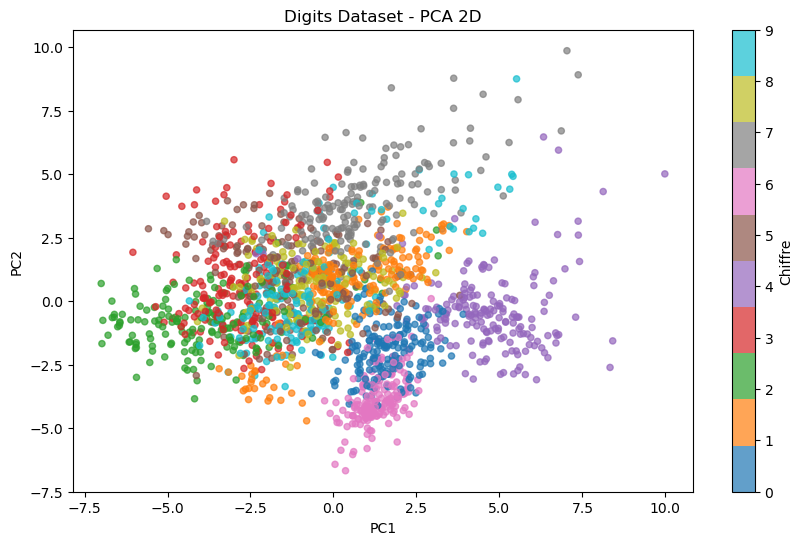

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    print(f"\n🧪 Kernel: {kernel}")
    clf = SVC(kernel=kernel, C=1.0)
    
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    y_pred = clf.predict(X_test)
    
    print(f"Temps d'entraînement : {end - start:.3f} sec")
    print(classification_report(y_test, y_pred, digits=3))

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)
clf2d = SVC(kernel='linear', C=1.0)
clf2d.fit(X_train2d, y_train2d)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', s=20, alpha=0.7)
plt.title("Digits Dataset - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Chiffre")
plt.show()


# task 3

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import datetime

df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')

print("Shape initiale:", df.shape)
print(df.head())
print(df.dtypes)

Shape initiale: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice  

C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

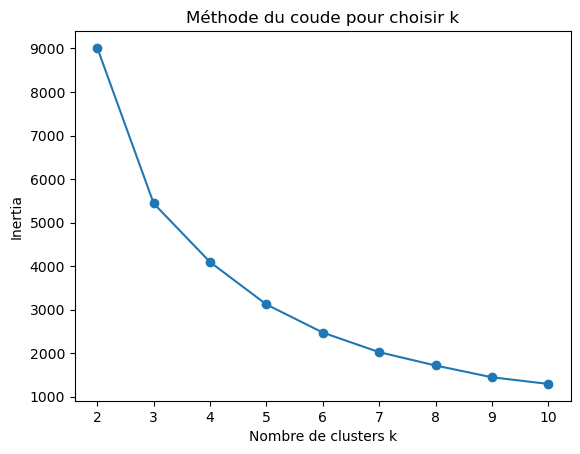

C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

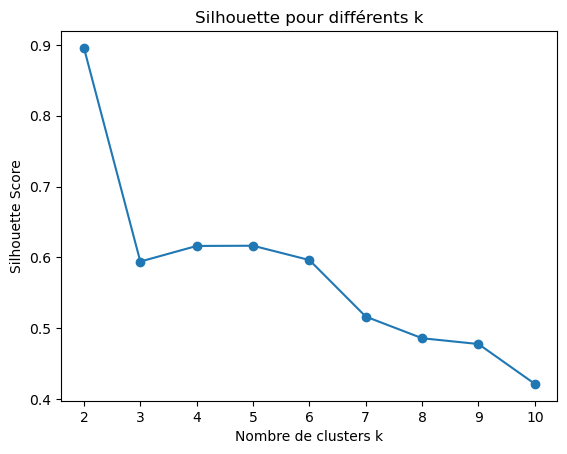

In [7]:
# 2. Nettoyage des données
# Supprimer les lignes sans CustomerID
df = df.dropna(subset=['CustomerID'])

# Supprimer les retours : Quantity négative
df = df[df['Quantity'] > 0]

# Supprimer les prix non positifs s'il y en a
df = df[df['UnitPrice'] > 0]

# Convertir les types
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Créer une colonne TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# -------------------------------
# 3. Construction du profil client (RFM)
# -------------------------------
# "Now" pour recency : date de référence (après la dernière date du dataset)
reference_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# 4. Standardisation


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)  # toutes les colonnes

# -------------------------------
# 5. Choix du nombre de clusters (K)
# -------------------------------

# Méthode du coude : inertia
inertias = []
K_range = range(2, 11)  # par exemple de 2 à 10 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour choisir k')
plt.show()

# Méthode de la silhouette
silhouette_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette pour différents k')
plt.show()


C:\Users\asus\OneDrive\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


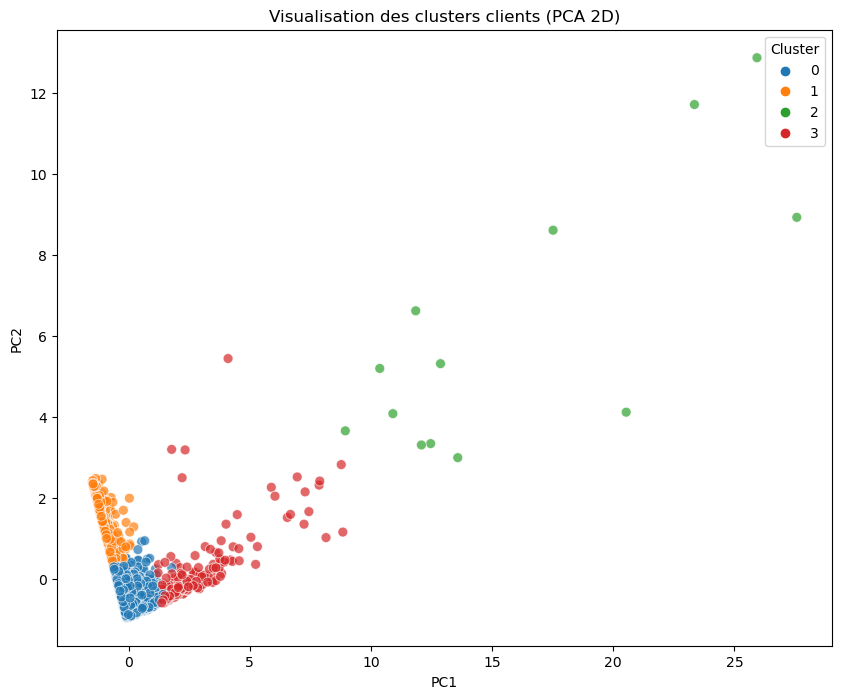

KeyError: "Column(s) ['AvgBasket'] do not exist"

In [8]:

# -------------------------------
# 6. Application de KMeans avec k choisi
# -------------------------------

# Supposons que le meilleur k = 4 (juste un exemple : tu verras ce que donnent les courbes)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_scaled)

# Ajouter les labels dans le dataframe
rfm['Cluster'] = cluster_labels

# -------------------------------
# 7. Réduction de dimension pour visualiser (PCA)
# -------------------------------

pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=rfm['Cluster'], palette='tab10', s=50, alpha=0.7)
plt.title('Visualisation des clusters clients (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

# -------------------------------
# 8. Analyse des clusters
# -------------------------------

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'AvgBasket': ['mean', 'median'],
    'Cluster': 'count'
})

# Renommer les colonnes pour plus de clarté
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.rename(columns={'Cluster_count':'Count'})

print("Résumé par cluster :")
print(cluster_summary)

# -------------------------------
# 9. Propositions marketing (à partir des résultats)
# -------------------------------

# Exemple : identifier cluster "VIP", "Clients récents mais peu fréquents", etc.
for cluster in sorted(rfm['Cluster'].unique()):
    data = rfm[rfm['Cluster'] == cluster]
    print(f"\n== Cluster {cluster} ==")
    print(f"Nombre de clients : {data.shape[0]}")
    print(f"Recency moyenne : {data['Recency'].mean():.1f} jours")
    print(f"Frequency moyenne : {data['Frequency'].mean():.1f} commandes")
    print(f"Monetary moyenne : {data['Monetary'].mean():.1f}")
    print(f"Panier moyen : {data['AvgBasket'].mean():.1f}")
    # Ici tu peux ajouter ton interprétation

# Fin du script